In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.compose import make_column_transformer

In [3]:
data = pd.read_csv("medical_insurance_cost.csv")
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Lets Perform Some EDA**

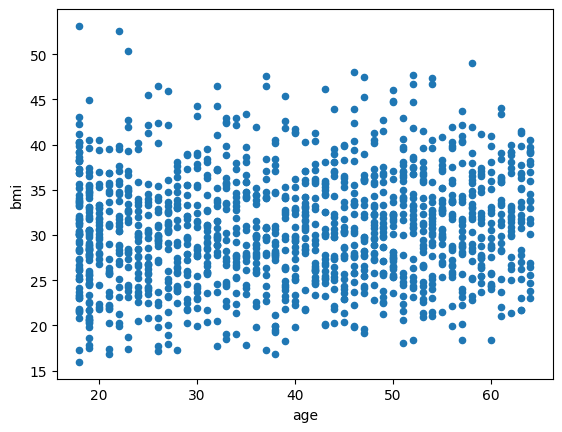

In [5]:
age_bmi = data[["age","bmi"]]
ax = age_bmi.plot.scatter(x="age",
                          y="bmi")


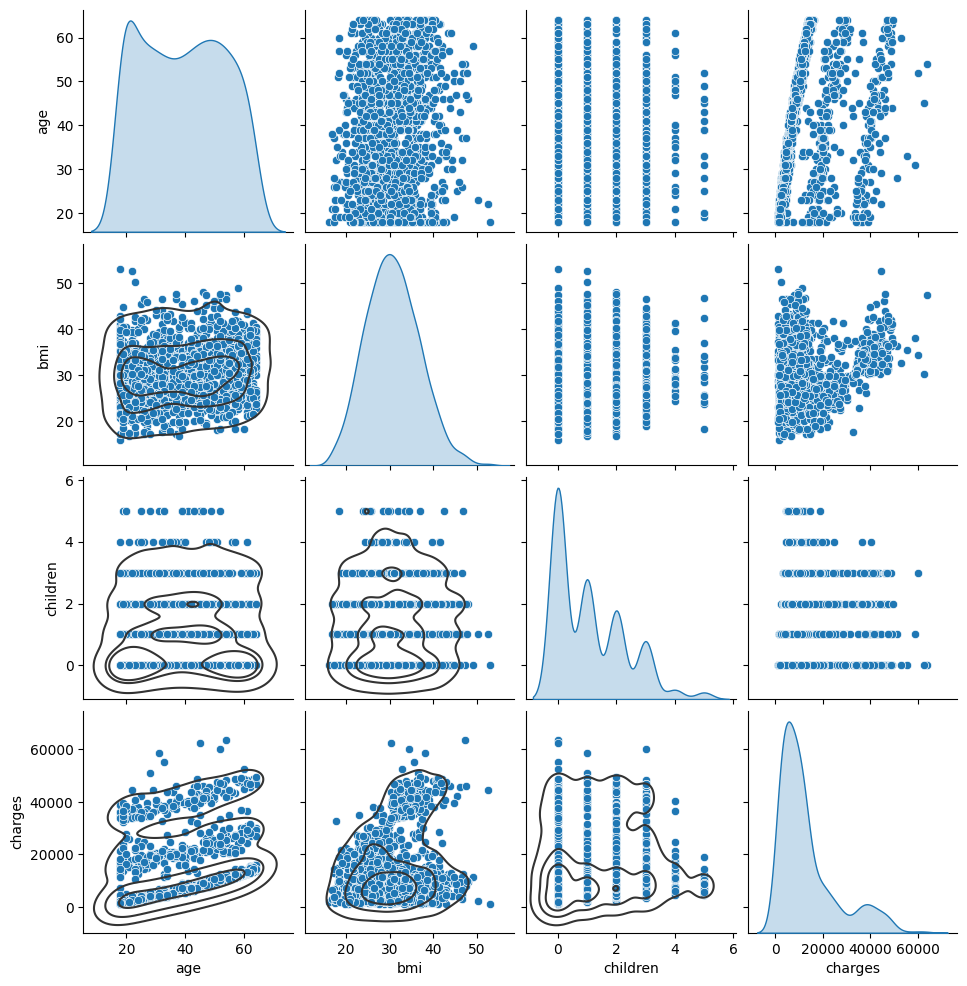

In [6]:
# From the scatter plot above we can see there is no visible correlation between 
# age and bmi.

g = sns.pairplot(data, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

<Axes: xlabel='age', ylabel='charges'>

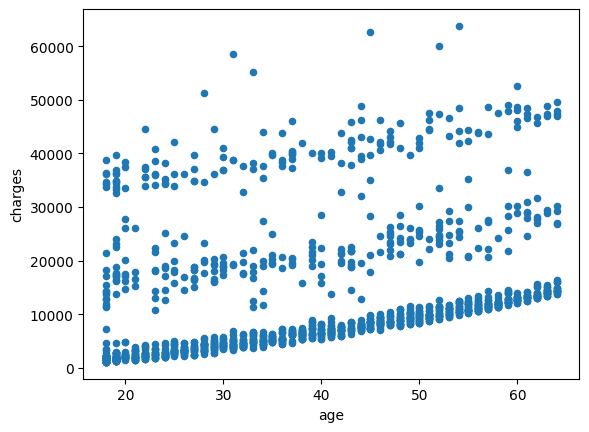

In [7]:
age_charges = data[["age","charges"]]
age_charges.plot.scatter(x="age",
                         y="charges")

In [6]:
corr_matrix = np.corrcoef(data['age'], data['charges'])
corr_matrix # Very week to no correlation.

array([[1.        , 0.29900819],
       [0.29900819, 1.        ]])

In [7]:
corr_matrix2 = np.corrcoef(data["age"],data["bmi"])
corr_matrix2 # also weak to no correlation.

array([[1.        , 0.10927188],
       [0.10927188, 1.        ]])

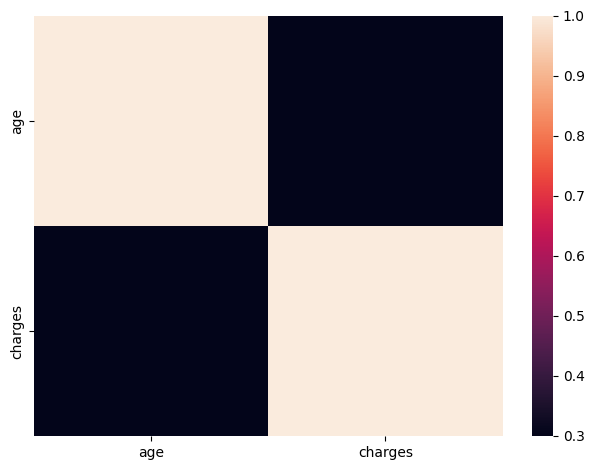

In [8]:

sns.regplot(data=data,x="age",y="charges") #The built-in function replot plot a scatterplot as well
# as a regression fit.
sns.heatmap(data[["age","charges"]].corr())# return a correlation matrix of the data. This heatmap shows almost no correlation.
plt.tight_layout()
plt.show()

**Data Preprocessing**

First thing do is selecet the features that we'll use to train the model. We use one-hot encoding for all non-numerical data, drop the features that are irrelevant, scale the relevant features, and separate into training data and testing data.

In [4]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# This built in funciton will allow us to scale our data and encode non-numerical data.
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

****Data Preprocessing****

In [5]:
X = data.drop(['charges'],axis=1)
y = data['charges']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=13,train_size=0.8)



t = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

t.fit(X_train)
X_train_normal = t.transform(X_train)
X_test_normal = t.transform(X_test)



***Model Creation***

In [6]:
model1 = LinearRegression()
model1.fit(X_train_normal,y_train)


LinearRegression()

In [16]:
X_test

,age,sex,bmi,children,smoker,region
200,19,female,32.11,0,no,northwest
350,57,female,23.18,0,no,northwest
226,28,male,38.06,0,no,southeast
709,36,female,27.74,0,no,northeast
293,22,female,28.82,0,no,southeast
...,...,...,...,...,...,...
287,63,female,26.22,0,no,northwest
433,60,female,30.50,0,no,southwest
66,61,female,39.10,2,no,southwest
1185,45,male,23.56,2,no,northeast


In [7]:
y_predict = model1.predict(X_test_normal)
y_predict

array([ 3600.84757824, 10353.60606981,  7247.53040669,  6661.27764925,
        2543.96751265, 16353.71187466, 13658.07752938,  5407.47201226,
       32184.48705221, 28661.81941062,  9181.95449826, 10326.60596382,
        3468.81409881,  6390.60700372,  7406.40170852,  7216.07431951,
       33337.21850759, 30435.99649089, 15041.78017196,   417.66188896,
        7706.74587818,  5550.53832266, 28454.75485623, 14792.61767992,
       40437.05958329, 28379.04013371, 33719.22121508,  2895.81735814,
       10898.08517778, 15444.68848735, 12219.88584049, 28664.5614591 ,
        2924.27600095,  7471.7696333 , 37473.40435954, 26924.3359047 ,
        6674.21708208, 11622.9167336 , 35962.88120372,  4728.00587943,
        8580.14434213, 18458.94344207, 10430.78103491,  8618.62862778,
         965.43255995,  5947.80201163, 15768.93345927,  5863.38473425,
        2336.3259301 , 10569.92039868, 32666.28905913, 33926.58292985,
        7721.41769839,  9953.79415389, 14294.27378064,  5491.85515848,
      

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_predict)}")
print(f"Coefficient of determination: {r2_score(y_test, y_predict)}")

Mean squared error: 28560666.713329997
Coefficient of determination: 0.7990637930035749


In [ ]:
# The model has an accuracy of about 79 percent.